In [1]:
# Import packages

%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import  datasets

# Change path for different computer

rookieWR2018_path = r'C:\Users\Jeremy\Desktop\RookieWR2018.csv'
rookieWRPrev_path = r'C:\Users\Jeremy\Desktop\RookieWR08-17.csv'
projWR_path = r'C:\Users\Jeremy\Desktop\WR_Projected.csv'
trainingWR_path = r'C:\Users\Jeremy\Desktop\WR_Aggregate.csv'
WR2018_path = r'C:\Users\Jeremy\Desktop\WR2018.csv'
dfRookieWR2018 = pd.read_csv(rookieWR2018_path)
dfRookieWRPrev = pd.read_csv(rookieWRPrev_path)
dfRookieWRPrevGraph = pd.read_csv(rookieWRPrev_path)
dfProjectedWR = pd.read_csv(projWR_path)
dfTrainingWR = pd.read_csv(trainingWR_path)
dfWR2018 = pd.read_csv(WR2018_path)
dfRookieWRPrev.columns

Index(['Name', 'GP-Col', 'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col',
       'Height', 'Weight', '40 Time', 'Vertical', 'Bench Press', 'Broad Jump',
       'GP', 'REC', 'RecYDS', 'Y/R', 'RecTD', 'FantPt'],
      dtype='object')

In [3]:
dfRookieWR2018.head()

,Name,GP,REC,RecYDS,Y/R,RecTD,Height,Weight,40 Time,Vertical,Bench Press,Broad Jump
0,Antonio Callaway,26,89,1399,15.7,7,71,200,4.41,34.0,NaN,121.0
1,Keke Coutee,30,159,2424,15.2,17,71,180,4.43,34.5,14.0,113.0
2,Michael Gallup,26,176,2690,15.3,21,73,198,4.51,36.0,10.0,122.0
3,Christian Kirk,39,234,2856,12.2,26,71,200,4.47,35.5,20.0,115.0
4,Anthony Miller,38,238,3590,15.1,37,71,190,NaN,NaN,22.0,NaN


In [4]:
dfRookieWRPrev.columns

Index(['Name', 'GP-Col', 'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col',
       'Height', 'Weight', '40 Time', 'Vertical', 'Bench Press', 'Broad Jump',
       'GP', 'REC', 'RecYDS', 'Y/R', 'RecTD', 'FantPt'],
      dtype='object')

In [5]:
dfTrainingWR.head()

,Name,GS,Tgt,Rec,Yds,Y/R,TD,Fmb,QBs Rat,OPPG,SOS,FantPt
0,Antonio Brown,16,181,129,1698,13.16,13,2,103.3,27.2,-1.0,252
1,Jordy Nelson,16,151,98,1519,15.50,13,0,112.2,30.4,1.0,230
2,Demaryius Thomas,16,184,111,1619,14.59,11,0,101.5,30.1,1.0,230
3,Dez Bryant,16,136,88,1320,15.00,16,1,113.2,29.2,-0.3,228
4,Odell Beckham,11,130,91,1305,14.34,12,1,92.1,23.8,-0.3,204


In [6]:
dfTrainingWR.columns

Index(['Name', 'GS', 'Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Fmb', 'QBs Rat',
       'OPPG', 'SOS', 'FantPt'],
      dtype='object')

In [7]:
dfWR2018.columns

Index(['Name', 'Avg Tgt', 'Avg Rec', 'Avg Yds', 'Avg Y/R', 'Avg TD', 'Avg Fmb',
       'QBs Rat', 'Prev OPPG', 'SOS'],
      dtype='object')

In [8]:
# Deal with empty spaces 

dfRookieWR2018 = dfRookieWR2018.fillna(0)
dfRookieWRPrev = dfRookieWRPrev.fillna(0)
dfTrainingWR = dfTrainingWR.fillna(0)
dfWR2018 = dfWR2018.fillna(0)
dfRookieWRPrevGraph = dfRookieWRPrevGraph.dropna()
dfWR2018.head()

,Name,Avg Tgt,Avg Rec,Avg Yds,Avg Y/R,Avg TD,Avg Fmb,QBs Rat,Prev OPPG,SOS
0,Antonio Brown,156,103,1378,13.4,9,2,93.4,25.4,0.8
1,DeAndre Hopkins,149,87,1227,14.1,8,1,103.0,21.1,-1.0
2,Odell Beckham Jr.,169,106,1485,14.0,10,2,80.4,15.4,0.5
3,Julio Jones,158,100,1552,15.5,7,2,91.4,22.1,0.9
4,Michael Thomas,140,107,1303,12.2,8,2,103.9,28.0,0.8


In [9]:
# Train and test set construction for WR veterans

train, test = train_test_split(dfTrainingWR, test_size=0.2, random_state=33)
 
xtrain = train[['Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Fmb', 'QBs Rat',
       'OPPG', 'SOS']]
ytrain = train[['FantPt']]
 
xtest = test[['Tgt', 'Rec', 'Yds', 'Y/R', 'TD', 'Fmb', 'QBs Rat',
       'OPPG', 'SOS']]
ytest = test[['FantPt']]

In [10]:
# Train and test set construction for WR rookies

train2, test2 = train_test_split(dfRookieWRPrev, test_size=0.2, random_state=33)
 
xtrain2 = train2[['GP-Col', 'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col',
       'Height', 'Weight', '40 Time', 'Vertical', 'Bench Press', 'Broad Jump']]
ytrain2 = train2[['FantPt']]
 
xtest2 = test2[['GP-Col', 'REC-Col', 'RecYDS-Col', 'Y/R-Col', 'RecTD-Col',
       'Height', 'Weight', '40 Time', 'Vertical', 'Bench Press', 'Broad Jump']]
ytest2 = test2[['FantPt']]

In [11]:
#Linear Regression for veterans

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

       FantPt
44  -0.395126
6   -4.132440
15  -7.763497
29 -18.357469
8    3.013715
46   0.884653
48   0.716512
43   2.667377
4   -0.837715
32  -5.543100
1    2.267847
25   4.846325
Coefficients: 
 [[ 5.42500363e-03 -1.75614285e-01  1.11142313e-01 -1.13064234e+00
   5.77347937e+00 -7.44758878e-01 -6.47002697e-03  2.58029938e-01
  -2.63970463e-01]]
Mean squared error: 41.004
Variance score: 0.952


In [12]:
#Linear Regression for rookies

linReg2 = linear_model.LinearRegression()
linReg2.fit(xtrain2, ytrain2)

y_predLin2 = linReg2.predict(xtest2)

print(y_predLin2 - ytest2)

print('Coefficients: \n', linReg2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_predLin2))
print('Variance score: %.3f' % r2_score(ytest2, y_predLin2))

        FantPt
5   -13.681443
15  -45.963970
32  -64.353416
40   45.423505
37   83.889088
17   -6.743870
4   103.970707
23   24.567725
0   -65.054217
21   -4.583306
Coefficients: 
 [[-0.45440904 -0.19630842  0.04016563 -7.89411116 -3.12734121  4.98226216
  -0.02371832 17.6040321  -0.09413379 -1.41402255 -0.10988824]]
Mean squared error: 3125.392
Variance score: -1.467


In [13]:
# Ridge Regression for veterans

ridgeReg = linear_model.Ridge(alpha = 50)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

       FantPt
44  -0.592788
6   -5.343282
15  -8.391414
29 -14.442372
8   -0.149539
46   3.221010
48   4.759336
43   2.975872
4   -4.386098
32  -8.416141
1   -0.228680
25   4.679224
Coefficients: 
 [[ 0.06976682 -0.09294766  0.09922813 -0.09346822  5.07496768 -0.34674511
   0.11154439  0.12087662 -0.18845422]]
Mean squared error: 38.485
Variance score: 0.955


In [14]:
# Ridge Regression for rookies

ridgeReg2 = linear_model.Ridge(alpha = 50)

ridgeReg2.fit(xtrain2, ytrain2)

y_predRidge2 = ridgeReg2.predict(xtest2)

print(y_predRidge2 - ytest2)

print('Coefficients: \n', ridgeReg2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_predRidge2))
print('Variance score: %.3f' % r2_score(ytest2, y_predRidge2))

       FantPt
5  -31.265699
15 -55.499916
32 -63.389679
40  37.936769
37  69.698090
17   5.190879
4   84.653649
23  18.260798
0  -54.367750
21   2.339833
Coefficients: 
 [[-0.48876523 -0.01212957  0.01697409 -3.44620212 -2.33637192  1.57294976
  -0.02326656  6.98754206  0.45176313 -1.3200241  -0.08295155]]
Mean squared error: 2486.103
Variance score: -0.962


In [15]:
# Bayesian Ridge for veterans

bayesianRidge = linear_model.BayesianRidge()

bayesianRidge.fit(xtrain, ytrain)

y_pred_bayesianRidge = bayesianRidge.predict(xtest)

print('Coefficients: \n', bayesianRidge.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred_bayesianRidge))
print('Variance score: %.3f' % r2_score(ytest, y_pred_bayesianRidge))

Coefficients: 
 [ 1.09243043e-02 -1.25710387e-01  1.07101190e-01 -7.63448857e-01
  5.74247962e+00 -7.10348763e-01  4.13948702e-03  2.45324737e-01
 -2.41916664e-01]
Mean squared error: 40.089
Variance score: 0.953


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
# Bayesian Ridge for rookies

bayesianRidge2 = linear_model.BayesianRidge()

bayesianRidge2.fit(xtrain2, ytrain2)

y_pred_bayesianRidge2 = bayesianRidge2.predict(xtest2)

print('Coefficients: \n', bayesianRidge2.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_pred_bayesianRidge2))
print('Variance score: %.3f' % r2_score(ytest2, y_pred_bayesianRidge2))

Coefficients: 
 [-2.32883521e-05 -2.17880746e-04 -3.39836814e-03 -6.11104147e-06
 -7.98487712e-05  9.75277561e-07  1.77531880e-05  1.76060120e-05
  8.17952240e-05 -2.64271729e-05  4.07861941e-05]
Mean squared error: 1188.394
Variance score: 0.062


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# Support Vector Regression for veterans

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_supp = svr_rbf.predict(xtest)

print(y_supp - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_supp))
print('Variance score: %.3f' % r2_score(ytest, y_supp))

44   -18.927721
6     -4.581174
15   -56.032656
29    -4.260707
8    -19.286126
46    28.606433
48     6.238321
43    20.746176
4    -30.702251
32   -31.527983
1    -31.608735
25   -11.909492
Name: FantPt, dtype: float64
Mean squared error: 689.521
Variance score: 0.195


In [18]:
# Support Vector Regression for rookies

svr_rbf2 = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf2.fit(xtrain2, ytrain2.values.ravel())

y_supp2 = svr_rbf2.predict(xtest2)

print(y_supp2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_supp2))
print('Variance score: %.3f' % r2_score(ytest2, y_supp2))

5    -27.376230
15   -41.952580
32   -53.375509
40     4.622869
37    31.697707
17    -1.376230
4     52.620701
23    35.612537
0    -40.273901
21    -7.284838
Name: FantPt, dtype: float64
Mean squared error: 1209.868
Variance score: 0.045


In [19]:
# Random Forest Regression for veterans

randomForest = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest.fit(xtrain, ytrain.values.ravel())

y_rand = randomForest.predict(xtest)
print(y_rand - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rand))
print('Variance score: %.3f' % r2_score(ytest, y_rand))

44     2.50
6      1.31
15   -29.52
29    -1.52
8     -3.32
46    11.16
48    19.71
43     9.96
4    -10.52
32   -12.19
1    -11.16
25    -1.44
Name: FantPt, dtype: float64
Mean squared error: 157.571
Variance score: 0.816


In [20]:
# Random Forest Regression for rookies

randomForest2 = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest2.fit(xtrain2, ytrain2.values.ravel())

y_rand2 = randomForest2.predict(xtest2)
print(y_rand2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_rand2))
print('Variance score: %.3f' % r2_score(ytest2, y_rand2))

5     -4.03
15   -46.65
32   -51.68
40    11.63
37    60.50
17    29.52
4     62.08
23    24.46
0    -10.90
21    22.85
Name: FantPt, dtype: float64
Mean squared error: 1462.337
Variance score: -0.154


In [21]:
# Gradient Boosting Regression for veterans

gradBoost = GradientBoostingRegressor()
gradBoost.fit(xtrain, ytrain.values.ravel())

y_grad = gradBoost.predict(xtest)
print(y_grad - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_grad))
print('Variance score: %.3f' % r2_score(ytest, y_grad))

44     7.216048
6      6.733122
15   -17.757316
29    -7.949998
8      5.493049
46     3.498335
48    13.609941
43     7.912598
4     -6.896229
32    -4.853018
1     -4.260469
25    -0.803443
Name: FantPt, dtype: float64
Mean squared error: 71.341
Variance score: 0.917


In [22]:
# Gradient Boosting Regression for rookies

gradBoost2 = GradientBoostingRegressor()
gradBoost2.fit(xtrain2, ytrain2.values.ravel())

y_grad2 = gradBoost2.predict(xtest2)
print(y_grad2 - ytest2['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest2, y_grad2))
print('Variance score: %.3f' % r2_score(ytest2, y_grad2))

5     -4.191647
15   -37.125203
32   -19.310610
40    -1.536361
37    69.684951
17    34.977270
4     39.444853
23    20.399894
0     29.051960
21    11.540670
Name: FantPt, dtype: float64
Mean squared error: 1079.977
Variance score: 0.148


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


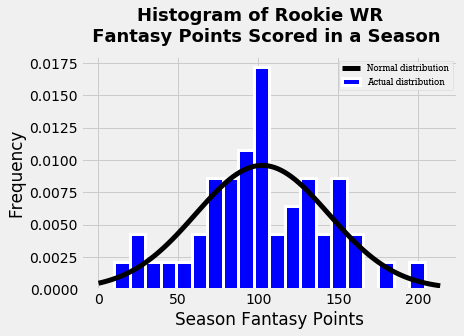

In [23]:
# Histogram graph of rookie WR fantasy points scored in a season

plt.style.use('fivethirtyeight')
rookiefantpthist, ax = plt.subplots()

ax.hist(dfRookieWRPrev['FantPt'], bins = 20, color = 'blue',edgecolor = 'white', linewidth = 3, normed = True, label = "Actual distribution")
rookiefantpthist.suptitle("Histogram of Rookie WR \n Fantasy Points Scored in a Season", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Season Fantasy Points")
ax.set_ylabel("Frequency")

overall_mean = dfRookieWRPrev['FantPt'].mean()
overall_std = dfRookieWRPrev['FantPt'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
ax.plot(x, p, 'k', linewidth=5, color='black', label = "Normal distribution")

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})

rookiefantpthist.savefig('rookiewr-fantpt-history.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 0.5402378678704743 , intercept = 63.16225366785314 , r_value = 0.029319889507933166 , p_value = 0.8431843018125504 , std_err = 2.7155451334670198


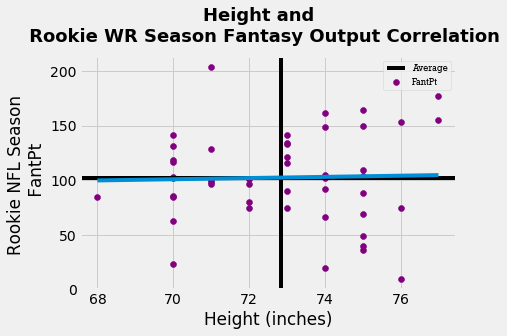

In [24]:
# Scatter plot of correlation between Height and Rookie WR season fantasy points (red zone WR)

plt.style.use('fivethirtyeight')
 
rookiewrheight, ax = plt.subplots()

ax.scatter(dfRookieWRPrev['Height'], dfRookieWRPrev['FantPt'], color = 'purple')
ax.axvline(x = np.mean(dfRookieWRPrev['Height']), color = 'black')
ax.axhline(y = np.mean(dfRookieWRPrev['FantPt']), label = "Average", color = 'black')
rookiewrheight.suptitle("Height and \n Rookie WR Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Height (inches)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieWRPrev['Height']), np.poly1d(np.polyfit(dfRookieWRPrev['Height'], dfRookieWRPrev['FantPt'], 1))(np.unique(dfRookieWRPrev['Height'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieWRPrev['Height'], dfRookieWRPrev['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookiewrheight.savefig('college-nfl-heightwr.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 37.892325787746906 , intercept = -63.305709745981545 , r_value = 0.0992827285360055 , p_value = 0.6083676603074593 , std_err = 73.08775530835707


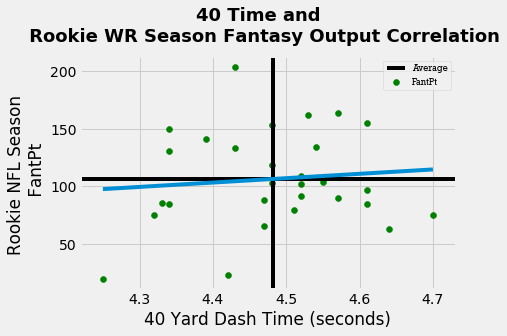

In [25]:
# Scatter plot of correlation between 40 Time and Rookie season fantasy points (deep threat WR)

plt.style.use('fivethirtyeight')
 
rookiewr40, ax = plt.subplots()

ax.scatter(dfRookieWRPrevGraph['40 Time'], dfRookieWRPrevGraph['FantPt'], color = 'green')
ax.axvline(x = np.mean(dfRookieWRPrevGraph['40 Time']), color = 'black')
ax.axhline(y = np.mean(dfRookieWRPrevGraph['FantPt']), label = "Average", color = 'black')
rookiewr40.suptitle("40 Time and \n Rookie WR Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("40 Yard Dash Time (seconds)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieWRPrevGraph['40 Time']), np.poly1d(np.polyfit(dfRookieWRPrevGraph['40 Time'], dfRookieWRPrevGraph['FantPt'], 1))(np.unique(dfRookieWRPrevGraph['40 Time'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieWRPrevGraph['40 Time'], dfRookieWRPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookiewr40.savefig('college-nfl-40wr.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 37.892325787746906 , intercept = -63.305709745981545 , r_value = 0.0992827285360055 , p_value = 0.6083676603074593 , std_err = 73.08775530835707


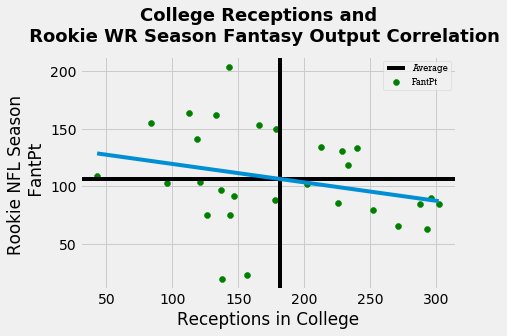

In [26]:
# Scatter plot of correlation between college receptions and Rookie season fantasy points (possession WR)

plt.style.use('fivethirtyeight')
 
rookiewr40, ax = plt.subplots()

ax.scatter(dfRookieWRPrevGraph['REC-Col'], dfRookieWRPrevGraph['FantPt'], color = 'green')
ax.axvline(x = np.mean(dfRookieWRPrevGraph['REC-Col']), color = 'black')
ax.axhline(y = np.mean(dfRookieWRPrevGraph['FantPt']), label = "Average", color = 'black')
rookiewr40.suptitle("College Receptions and \n Rookie WR Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Receptions in College")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieWRPrevGraph['REC-Col']), np.poly1d(np.polyfit(dfRookieWRPrevGraph['REC-Col'], dfRookieWRPrevGraph['FantPt'], 1))(np.unique(dfRookieWRPrevGraph['REC-Col'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieWRPrevGraph['40 Time'], dfRookieWRPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookiewr40.savefig('college-nfl-recwr.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -0.11300943228332458 , intercept = 110.50569496351665 , r_value = -0.00712944079988747 , p_value = 0.9707204018622292 , std_err = 3.050466825625422


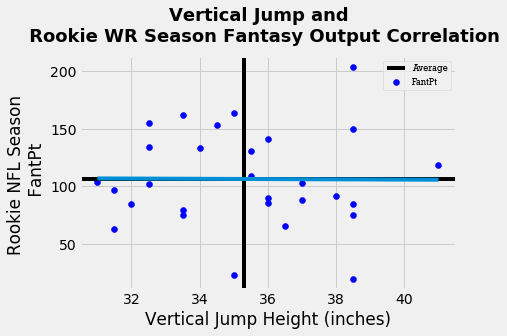

In [27]:
# Scatter plot of correlation between Vertical Jump and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookiewrvert, ax = plt.subplots()

ax.scatter(dfRookieWRPrevGraph['Vertical'], dfRookieWRPrevGraph['FantPt'], color = 'blue')
ax.axvline(x = np.mean(dfRookieWRPrevGraph['Vertical']), color = 'black')
ax.axhline(y = np.mean(dfRookieWRPrevGraph['FantPt']), label = "Average", color = 'black')
rookiewrvert.suptitle("Vertical Jump and \n Rookie WR Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Vertical Jump Height (inches)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieWRPrevGraph['Vertical']), np.poly1d(np.polyfit(dfRookieWRPrevGraph['Vertical'], dfRookieWRPrevGraph['FantPt'], 1))(np.unique(dfRookieWRPrevGraph['Vertical'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieWRPrevGraph['Vertical'], dfRookieWRPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookiewrvert.savefig('college-nfl-vertwr.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 1.234402460456942 , intercept = -43.99472759226711 , r_value = 0.1401842295078248 , p_value = 0.4682668445041269 , std_err = 1.6778995431883295


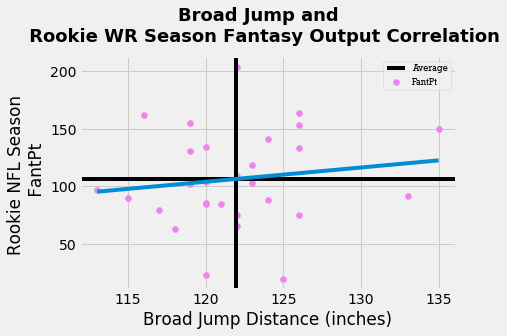

In [28]:
# Scatter plot of correlation between Broad Jump and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
rookiewrbroad, ax = plt.subplots()

ax.scatter(dfRookieWRPrevGraph['Broad Jump'], dfRookieWRPrevGraph['FantPt'], color = 'violet')
ax.axvline(x = np.mean(dfRookieWRPrevGraph['Broad Jump']), color = 'black')
ax.axhline(y = np.mean(dfRookieWRPrevGraph['FantPt']), label = "Average", color = 'black')
rookiewrbroad.suptitle("Broad Jump and \n Rookie WR Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Broad Jump Distance (inches)")
ax.set_ylabel("Rookie NFL Season \n FantPt")
 
ax.plot(np.unique(dfRookieWRPrevGraph['Broad Jump']), np.poly1d(np.polyfit(dfRookieWRPrevGraph['Broad Jump'], dfRookieWRPrevGraph['FantPt'], 1))(np.unique(dfRookieWRPrevGraph['Broad Jump'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfRookieWRPrevGraph['Broad Jump'], dfRookieWRPrevGraph['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookiewrbroad.savefig('college-nfl-broadwr.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = -0.7473659928758423 , intercept = 182.73255976138364 , r_value = -0.026368426851402022 , p_value = 0.8428568357377 , std_err = 3.75284519819108


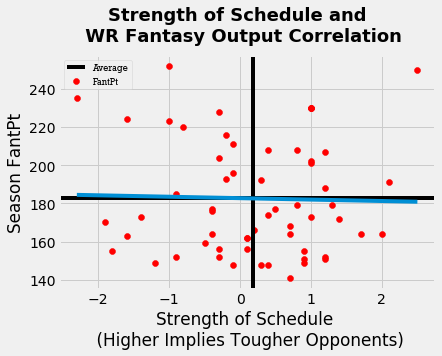

In [32]:
# Scatter plot of correlation between Strength of Schedule and Rookie season WR fantasy points

plt.style.use('fivethirtyeight')
 
rookierbsos, ax = plt.subplots()

ax.scatter(dfTrainingWR['SOS'], dfTrainingWR['FantPt'], color = 'red')
ax.axvline(x = np.mean(dfTrainingWR['SOS']), color = 'black')
ax.axhline(y = np.mean(dfTrainingWR['FantPt']), label = "Average", color = 'black')
rookierbsos.suptitle("Strength of Schedule and \n WR Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Strength of Schedule \n (Higher Implies Tougher Opponents)")
ax.set_ylabel("Season FantPt")
 
ax.plot(np.unique(dfTrainingWR['SOS']), np.poly1d(np.polyfit(dfTrainingWR['SOS'], dfTrainingWR['FantPt'], 1))(np.unique(dfTrainingWR['SOS'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingWR['SOS'], dfTrainingWR['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

rookierbsos.savefig('sos-fantptwr.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 0.6039027352533727 , intercept = 124.92153268624402 , r_value = 0.1945722515865634 , p_value = 0.13975214675251907 , std_err = 0.4032442369806615


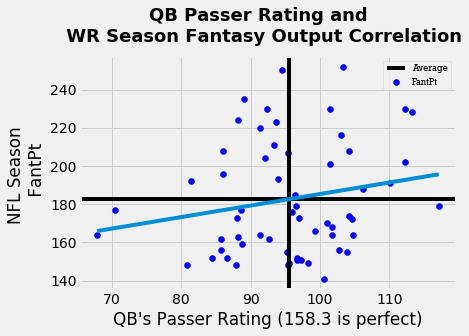

In [33]:
# Scatter plot of correlation between QB's Rating (performance) and season fantasy points

plt.style.use('fivethirtyeight')
 
wrqbrat, ax = plt.subplots()

ax.scatter(dfTrainingWR['QBs Rat'], dfTrainingWR['FantPt'], color = 'blue')
ax.axvline(x = np.mean(dfTrainingWR['QBs Rat']), color = 'black')
ax.axhline(y = np.mean(dfTrainingWR['FantPt']), label = "Average", color = 'black')
wrqbrat.suptitle("QB Passer Rating and \n WR Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("QB's Passer Rating (158.3 is perfect)")
ax.set_ylabel("NFL Season \n FantPt")
 
ax.plot(np.unique(dfTrainingWR['QBs Rat']), np.poly1d(np.polyfit(dfTrainingWR['QBs Rat'], dfTrainingWR['FantPt'], 1))(np.unique(dfTrainingWR['QBs Rat'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingWR['QBs Rat'], dfTrainingWR['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

wrqbrat.savefig('QBRat-FantPtWR.png', dpi = 400, bbox_inches = 'tight')

Wingspan and DWS: slope = 1.6294550188647163 , intercept = 142.4368203825543 , r_value = 0.21125844195210586 , p_value = 0.1082358709072434 , std_err = 0.9985657048089654


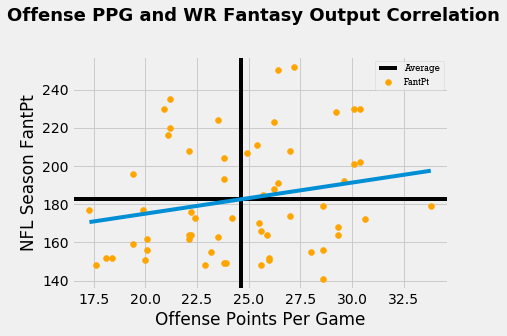

In [35]:
# Scatter plot of correlation between Offense Points Per Game and Rookie season fantasy points

plt.style.use('fivethirtyeight')
 
wroppg, ax = plt.subplots()

ax.scatter(dfTrainingWR['OPPG'], dfTrainingWR['FantPt'], color = 'orange')
ax.axvline(x = np.mean(dfTrainingWR['OPPG']), color = 'black')
ax.axhline(y = np.mean(dfTrainingWR['FantPt']), label = "Average", color = 'black')
wroppg.suptitle("Offense PPG and WR Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Offense Points Per Game")
ax.set_ylabel("NFL Season FantPt")
 
ax.plot(np.unique(dfTrainingWR['OPPG']), np.poly1d(np.polyfit(dfTrainingWR['OPPG'], dfTrainingWR['FantPt'], 1))(np.unique(dfTrainingWR['OPPG'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingWR['OPPG'], dfTrainingWR['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

wroppg.savefig('OPPG-fantptwr.png', dpi = 400, bbox_inches = 'tight')

In [36]:
# Linear Regression predictions 
# Rookies

rookieWR = dfRookieWR2018.loc[:, 'GP': 'Broad Jump']
linear_predsR = linReg2.predict(rookieWR)

veteranWR = dfWR2018.loc[:, 'Avg Tgt': 'SOS']
linear_predsV = linReg.predict(veteranWR)

linear_preds = []
rows = 0
cols = 0

namesR = dfRookieWR2018.iloc[:, 0]
print("2018 NFL season fantasy points prediction for rookie WRs using Linear Regression: ")
for i in(namesR):
    linear_preds.append([i, linear_predsR[rows][cols]])
    print(i, linear_predsR[rows][cols])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
namesV = dfWR2018.iloc[:, 0]
print("2018 NFL season fantasy points prediction for veteran WRs using Linear Regression: ")
for i in(namesV):
    linear_preds.append([i, linear_predsV[rows][cols]])
    print(i, linear_predsV[rows][cols])  
    rows+=1
    
names = namesR.append(namesV)

2018 NFL season fantasy points prediction for rookie WRs using Linear Regression: 
Antonio Callaway 126.84553795062862
Keke Coutee 106.99189770573537
Michael Gallup 118.3293849215242
Christian Kirk 92.49864893277737
Anthony Miller -0.9462670052836586
D.J. Moore 96.15529235682243
Calvin Ridley 127.0305342115094
Dante Pettis 45.70639570043181
Tre'Quan Smith 105.46289691840155
Courtland Sutton 87.3126260179989

2018 NFL season fantasy points prediction for veteran WRs using Linear Regression: 
Antonio Brown 192.42102880472507
DeAndre Hopkins 171.89372876772325
Odell Beckham Jr. 206.53503458099104
Julio Jones 197.51122069786715
Michael Thomas 179.48233211157356
Davante Adams 146.73173445038756
Keenan Allen 164.06459111160092
A.J. Green 181.3175582648595
Mike Evans 173.73294935120506
Tyreek Hill 163.14204937116327
Stefon Diggs 147.9703010639327
T.Y. Hilton 154.12237881203353
Adam Thielen 183.34507559068498
Amari Cooper 143.9096894109565
Doug Baldwin 122.62344390876011
JuJu Smith-Schuster 17

In [37]:
# Ridge Regression predictions 
# Rookies

rows = 0
cols = 0
ridge_preds = []
ridge_predsR = ridgeReg2.predict(rookieWR)
print("2018 NFL season fantasy points prediction for rookie WRs using Ridge Regression: ")
for i in(namesR):
    ridge_preds.append([i, ridge_predsR[rows][cols]])
    print(i, ridge_predsR[rows][cols])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
ridge_predsV = ridgeReg.predict(veteranWR)
print("2018 NFL season fantasy points prediction for veteran WRs using Ridge Regression: ")
for i in(namesV):
    ridge_preds.append([i, ridge_predsV[rows][cols]])
    print(i, ridge_predsV[rows][cols])  
    rows+=1

2018 NFL season fantasy points prediction for rookie WRs using Ridge Regression: 
Antonio Callaway 134.21292586998592
Keke Coutee 110.18086258053138
Michael Gallup 115.2520042401712
Christian Kirk 93.69621170795781
Anthony Miller 30.761508157273987
D.J. Moore 103.62580996012082
Calvin Ridley 113.8469947198032
Dante Pettis 69.10806479453046
Tre'Quan Smith 102.86914565028324
Courtland Sutton 81.6141549016076

2018 NFL season fantasy points prediction for veteran WRs using Ridge Regression: 
Antonio Brown 192.20344387535536
DeAndre Hopkins 174.3154145030313
Odell Beckham Jr. 205.86555957887396
Julio Jones 198.9004701988258
Michael Thomas 179.79596363021867
Davante Adams 148.25360192703178
Keenan Allen 165.63045455794054
A.J. Green 182.03327063989457
Mike Evans 175.51281454056098
Tyreek Hill 151.01192344127105
Stefon Diggs 148.3447505580355
T.Y. Hilton 146.37071984163575
Adam Thielen 184.28970807729445
Amari Cooper 145.0151902678671
Doug Baldwin 123.54439343472077
JuJu Smith-Schuster 173.5

In [38]:
# Bayesian Ridge Regression predictions 
# Rookies

rows = 0
cols = 0
bayes_preds = []
bayes_predsR = bayesianRidge2.predict(rookieWR)
print("2018 NFL season fantasy points prediction for rookie WRs using Bayesian Ridge Regression: ")
for i in(namesR):
    bayes_preds.append([i, bayes_predsR[rows]])
    print(i, bayes_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
cols = 0
bayes_predsV = bayesianRidge.predict(veteranWR)
print("2018 NFL season fantasy points prediction for veteran WRs using Bayesian Ridge Regression: ")
for i in(namesV):
    bayes_preds.append([i, bayes_predsV[rows]])
    print(i, bayes_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie WRs using Bayesian Ridge Regression: 
Antonio Callaway 106.23657220237529
Keke Coutee 102.73609453195908
Michael Gallup 101.82911617362757
Christian Kirk 101.25110910898667
Anthony Miller 98.74705936955444
D.J. Moore 104.08972602161076
Calvin Ridley 101.50799064556851
Dante Pettis 103.29821558665208
Tre'Quan Smith 101.6339976254971
Courtland Sutton 100.02289626460944

2018 NFL season fantasy points prediction for veteran WRs using Bayesian Ridge Regression: 
Antonio Brown 192.39881149055023
DeAndre Hopkins 172.01517551846712
Odell Beckham Jr. 206.4734482137774
Julio Jones 197.5031542138956
Michael Thomas 179.5435597636487
Davante Adams 146.71054153374217
Keenan Allen 164.12618974480338
A.J. Green 181.36742390341487
Mike Evans 173.83539612559304
Tyreek Hill 162.0459636630124
Stefon Diggs 147.8831741796666
T.Y. Hilton 153.32667079631906
Adam Thielen 183.3716263853558
Amari Cooper 143.91278749092584
Doug Baldwin 122.50020012015128
JuJu 

In [39]:
# Support Vector Regression predictions 
# Rookies

rows = 0
svr_preds = []
svr_predsR = svr_rbf2.predict(rookieWR)
print("2018 NFL season fantasy points prediction for rookie WRs using Support Vector Regression: ")
for i in(namesR):
    svr_preds.append([i, svr_predsR[rows]])
    print(i, svr_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
svr_predsV = svr_rbf.predict(veteranWR)
print("2018 NFL season fantasy points prediction for veteran WRs using Support Vector Regression: ")
for i in(namesV):
    svr_preds.append([i, svr_predsV[rows]])
    print(i, svr_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie WRs using Support Vector Regression: 
Antonio Callaway 101.62377013387345
Keke Coutee 104.02114696593934
Michael Gallup 71.12163282074658
Christian Kirk 101.56524097188978
Anthony Miller 101.6237700917516
D.J. Moore 128.5822062622738
Calvin Ridley 101.46919572902017
Dante Pettis 101.62143820759921
Tre'Quan Smith 58.52427322491357
Courtland Sutton 101.51883731584067

2018 NFL season fantasy points prediction for veteran WRs using Support Vector Regression: 
Antonio Brown 198.75119697207677
DeAndre Hopkins 171.04470700976492
Odell Beckham Jr. 218.71371345971573
Julio Jones 194.6057570819981
Michael Thomas 186.38195412539534
Davante Adams 150.56116101622987
Keenan Allen 164.40984913283583
A.J. Green 146.7669438258107
Mike Evans 183.18775666903144
Tyreek Hill 182.99730004425547
Stefon Diggs 178.22138738659714
T.Y. Hilton 182.98164055841644
Adam Thielen 201.71200197285765
Amari Cooper 158.90163265002872
Doug Baldwin 179.2426515853465
JuJu

In [40]:
# Random Forest Regression predictions 
# Rookies

rows = 0
rf_preds = []
rf_predsR = randomForest2.predict(rookieWR)
print("2018 NFL season fantasy points prediction for rookie WRs using Random Forest Regression: ")
for i in(namesR):
    rf_preds.append([i, rf_predsR[rows]])
    print(i, rf_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
rf_predsV = randomForest.predict(veteranWR)
print("2018 NFL season fantasy points prediction for veteran WRs using Random Forest Regression: ")
for i in(namesV):
    rf_preds.append([i, rf_predsV[rows]])
    print(i, rf_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie WRs using Random Forest Regression: 
Antonio Callaway 129.7
Keke Coutee 122.33
Michael Gallup 113.25
Christian Kirk 95.61
Anthony Miller 58.53
D.J. Moore 130.0
Calvin Ridley 101.78
Dante Pettis 85.82
Tre'Quan Smith 103.72
Courtland Sutton 111.07

2018 NFL season fantasy points prediction for veteran WRs using Random Forest Regression: 
Antonio Brown 202.99
DeAndre Hopkins 163.17
Odell Beckham Jr. 206.95
Julio Jones 191.03
Michael Thomas 178.8
Davante Adams 151.24
Keenan Allen 159.22
A.J. Green 176.67
Mike Evans 163.19
Tyreek Hill 159.51
Stefon Diggs 155.28
T.Y. Hilton 156.67
Adam Thielen 190.36
Amari Cooper 153.97
Doug Baldwin 149.84
JuJu Smith-Schuster 163.25
Larry Fitzgerald 158.22
Jarvis Landry 152.64
Brandin Cooks 161.21
Demaryius Thomas 159.97
Golden Tate 150.15
Josh Gordon 157.7
Allen Robinson 154.66
Chris Hogan 148.03
Marvin Jones 148.97
Alshon Jeffery 149.1
Corey Davis 148.24
Marquise Goodwin 148.92
Michael Crabtree 149.97
Em

In [41]:
# Gradient Boosting Regression predictions 
# Rookies

rows = 0
gb_preds = []
gb_predsR = gradBoost2.predict(rookieWR)
print("2018 NFL season fantasy points prediction for rookie WRs using Gradient Boosting Regression: ")
for i in(namesR):
    gb_preds.append([i, gb_predsR[rows]])
    print(i, gb_predsR[rows])  
    rows+=1
    
print()

# Veterans
rows = 0
gb_predsV = gradBoost.predict(veteranWR)
print("2018 NFL season fantasy points prediction for veteran WRs using Gradient Boosting Regression: ")
for i in(namesV):
    gb_preds.append([i, gb_predsV[rows]])
    print(i, gb_predsV[rows])  
    rows+=1

2018 NFL season fantasy points prediction for rookie WRs using Gradient Boosting Regression: 
Antonio Callaway 129.6119587589079
Keke Coutee 116.76361518359676
Michael Gallup 127.77917310805516
Christian Kirk 82.5362470438053
Anthony Miller 53.3311365421731
D.J. Moore 129.77813874672415
Calvin Ridley 94.1912708664227
Dante Pettis 85.55190598928782
Tre'Quan Smith 124.116848997922
Courtland Sutton 98.27732834211194

2018 NFL season fantasy points prediction for veteran WRs using Gradient Boosting Regression: 
Antonio Brown 205.1194109636099
DeAndre Hopkins 168.6540672061022
Odell Beckham Jr. 207.44069013476587
Julio Jones 188.47397777731007
Michael Thomas 177.61361818479986
Davante Adams 148.14650434082122
Keenan Allen 164.5492253306321
A.J. Green 175.72111496273666
Mike Evans 167.73757952418168
Tyreek Hill 157.79257829841333
Stefon Diggs 155.595008356784
T.Y. Hilton 155.42116393449905
Adam Thielen 178.92202157417375
Amari Cooper 150.69785095814117
Doug Baldwin 142.99544445171
JuJu Smith

In [42]:
# Convert predictions to dataframes 

dflinear = pd.DataFrame(linear_preds, columns = ['Name', 'FantPtLinear'])
dfridge = pd.DataFrame(ridge_preds, columns = ['Name', 'FantPtRidge'])
dfbayes = pd.DataFrame(bayes_preds, columns = ['Name', 'FantPtBayes'])
dfrand = pd.DataFrame(rf_preds, columns = ['Name', 'FantPtRF'])
dfgrad = pd.DataFrame(gb_preds, columns = ['Name', 'FantPtGB'])
dfsvr = pd.DataFrame(svr_preds, columns = ['Name', 'FantPtSVR'])

In [43]:
# Merge with expected data/ ESPN Projections for validation

dflinear = dflinear.merge(dfProjectedWR)
dfridge = dfridge.merge(dfProjectedWR)
dfbayes = dfbayes.merge(dfProjectedWR)
dfrand = dfrand.merge(dfProjectedWR)
dfgrad = dfgrad.merge(dfProjectedWR)
dfsvr = dfsvr.merge(dfProjectedWR)
dflinear.head()

,Name,FantPtLinear,ESPN,Projected
0,Antonio Callaway,126.845538,47.0,82.4
1,Keke Coutee,106.991898,41.4,47.7
2,Michael Gallup,118.329385,71.3,57.1
3,Christian Kirk,92.498649,77.2,80.5
4,Anthony Miller,-0.946267,86.9,95.7


In [44]:
# RMSE and MSE validation for ESPN's Predictions

mse = 0
for row in dflinear.itertuples():
    temp = row.Projected-row.ESPN
    temp = temp * temp
    mse += temp
mse = mse/dflinear.shape[0]
rmse = math.sqrt(mse)

print("ESPN Mean Squared Error: " + str(mse))
print("ESPN Root Mean Squared Error: " + str(rmse))

ESPN Mean Squared Error: 1875.6308880000004
ESPN Root Mean Squared Error: 43.30855444366621


In [45]:
# RMSE and MSE validation for Linear Regression predictions

mselinear = 0
for row in dflinear.itertuples():
    temp = row.Projected-row.FantPtLinear
    temp = temp * temp
    mselinear += temp
mselinear = mselinear/dflinear.shape[0]
rmselinear = math.sqrt(mselinear)

print("Linear Regression Mean Squared Error: " + str(mselinear))
print("Linear Regression Root Mean Squared Error: " + str(rmselinear))

Linear Regression Mean Squared Error: 1795.3647042733958
Linear Regression Root Mean Squared Error: 42.37174417313259


In [46]:
# RMSE and MSE validation for Ridge Regression predictions

mseridge = 0
for row in dfridge.itertuples():
    temp = row.Projected-row.FantPtRidge
    temp = temp * temp
    mseridge += temp
mseridge = mseridge/dfridge.shape[0]
rmseridge = math.sqrt(mseridge)

print("Ridge Regression Mean Squared Error: " + str(mseridge))
print("Ridge Regression Root Mean Squared Error: " + str(rmseridge))

Ridge Regression Mean Squared Error: 1706.7755790100814
Ridge Regression Root Mean Squared Error: 41.31314051255462


In [47]:
# RMSE and MSE validation for Bayesian Ridge Regression predictions

msebayes = 0
for row in dfbayes.itertuples():
    temp = row.Projected-row.FantPtBayes
    temp = temp * temp
    msebayes += temp
msebayes = msebayes/dfbayes.shape[0]
rmsebayes = math.sqrt(msebayes)

print("Bayesian Ridge Regression Mean Squared Error: " + str(msebayes))
print("Bayesian Ridge Regression Root Mean Squared Error: " + str(rmsebayes))

Bayesian Ridge Regression Mean Squared Error: 1509.2899441912855
Bayesian Ridge Regression Root Mean Squared Error: 38.849581004063424


In [48]:
# RMSE and MSE validation for Random Forest Regression predictions

mserf = 0
for row in dfrand.itertuples():
    temp = row.Projected-row.FantPtRF
    temp = temp * temp
    mserf += temp
mserf = mserf/dfrand.shape[0]
rmserf = math.sqrt(mserf)

print("Random Forest Regression Mean Squared Error: " + str(mserf))
print("Random Forest Regression Root Mean Squared Error: " + str(rmserf))

Random Forest Regression Mean Squared Error: 2362.6744340000005
Random Forest Regression Root Mean Squared Error: 48.60734958830815


In [49]:
# RMSE and MSE validation for Gradient Boosting Regression predictions

msegb = 0
for row in dfgrad.itertuples():
    temp = row.Projected-row.FantPtGB
    temp = temp * temp
    msegb += temp
msegb = msegb/dfgrad.shape[0]
rmsegb = math.sqrt(msegb)

print("Gradient Boosting Regression Mean Squared Error: " + str(msegb))
print("Gradient Boosting Regression Root Mean Squared Error: " + str(rmsegb))

Gradient Boosting Regression Mean Squared Error: 2152.032905631323
Gradient Boosting Regression Root Mean Squared Error: 46.39000868324259


In [50]:
# RMSE and MSE validation for Support Vector Regression predictions

msesvr = 0
for row in dfsvr.itertuples():
    temp = row.Projected-row.FantPtSVR
    temp = temp * temp
    msesvr += temp
msesvr = msesvr/dfsvr.shape[0]
rmsesvr = math.sqrt(msesvr)

print("Support Vector Regression Mean Squared Error: " + str(msesvr))
print("Support Vector Regression Root Mean Squared Error: " + str(rmsesvr))

Support Vector Regression Mean Squared Error: 3297.621390758937
Support Vector Regression Root Mean Squared Error: 57.42491959732236


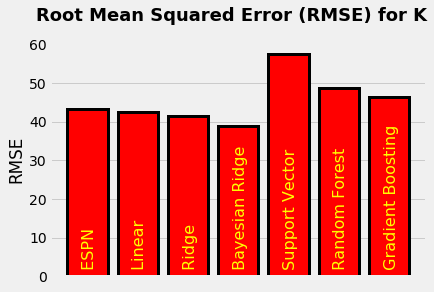

In [51]:
# Root Mean Squared Error Graph

rmsePlot, ax = plt.subplots()

rmseScores = [rmse, rmselinear, rmseridge, rmsebayes, rmsesvr, rmserf, rmsegb]
x_pos = np.arange(len(rmseScores))

ax.bar(x_pos, rmseScores, edgecolor = 'black', color = 'red', linewidth = 3)

rmseNames = [" ESPN", " Linear", " Ridge", " Bayesian Ridge", " Support Vector", " Random Forest", " Gradient Boosting"]

labels = [i for i in rmseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow', size = 16)

rmsePlot.suptitle("Root Mean Squared Error (RMSE) for K", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("RMSE")

rmsePlot.savefig('rmseWR-plot.png', dpi = 400, bbox_inches = 'tight')

[['Odell Beckham Jr.', 206.4734482137774], ['Julio Jones', 197.5031542138956], ['Antonio Brown', 192.39881149055023], ['Adam Thielen', 183.3716263853558], ['A.J. Green', 181.36742390341487], ['Michael Thomas', 179.5435597636487], ['JuJu Smith-Schuster', 174.6783058219162], ['Mike Evans', 173.83539612559304], ['DeAndre Hopkins', 172.01517551846712], ['Keenan Allen', 164.12618974480338]]


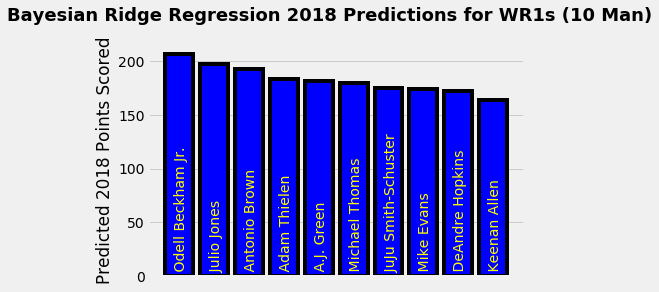

In [52]:
# Predictions for WR1s (WR#1 - WR#10) for using most accurate ML technique (Bayesian Ridge Regression) by RMSE

plt.style.use('fivethirtyeight')
bayespredictions, ax = plt.subplots()
bayesPlot = []

for i in range(len(bayes_preds)):
    bayesPlot.append(bayes_preds[i][1])
    
combinedBayes = [[i, j] for i, j in zip(names, bayesPlot)]
sortedBayes = sorted(combinedBayes, key = itemgetter(1), reverse = True)

WR1Bayes = []
WR1Bayes = sortedBayes[0:10]
print(WR1Bayes)

sortedBayesData = [row[1] for row in WR1Bayes]
x_pos = np.arange(len(sortedBayesData))

ax.bar(x_pos, sortedBayesData, color = 'blue' ,edgecolor = 'black', linewidth = 4)
labels = [' '+ row[0] for row in sortedBayes]
rects = ax.patches
test = 0
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow')
    test += 1

bayespredictions.suptitle("Bayesian Ridge Regression 2018 Predictions for WR1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

bayespredictions.savefig('bayesianridgepredictionsWR1.png', dpi = 400, bbox_inches = 'tight')

[['Tyreek Hill', 162.0459636630124], ['Demaryius Thomas', 161.0839172580213], ['Larry Fitzgerald', 159.8236712363618], ['Brandin Cooks', 158.2941810227983], ['Allen Robinson', 154.86338574007107], ['Josh Gordon', 154.45395142570163], ['T.Y. Hilton', 153.32667079631906], ['Cooper Kupp', 150.67345115460787], ['Stefon Diggs', 147.8831741796666], ['Davante Adams', 146.71054153374217]]


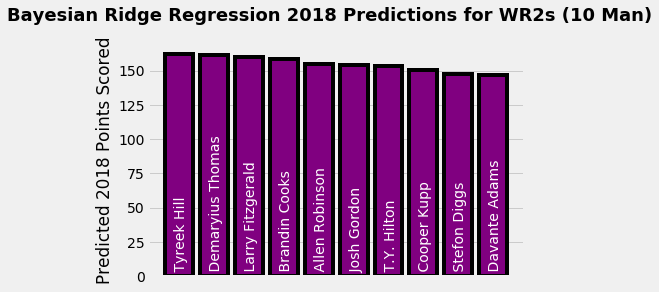

In [53]:
# Predictions for WR2s (WR#11 - WR#20) for using most accurate ML technique (Bayesian Ridge Regression) by RMSE

plt.style.use('fivethirtyeight')
bayespredictions, ax = plt.subplots()

WR2Bayes= []
WR2Bayes = sortedBayes[10:20]
print(WR2Bayes)

sortedBayesData = [row[1] for row in WR2Bayes]
x_pos = np.arange(len(sortedBayesData))

ax.bar(x_pos, sortedBayesData, color = 'purple' ,edgecolor = 'black', linewidth = 4)

labelsWR2 = labels[10:20]
rects = ax.patches
test = 0
for rect, label in zip(rects, labelsWR2):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')
    test += 1

bayespredictions.suptitle("Bayesian Ridge Regression 2018 Predictions for WR2s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

bayespredictions.savefig('bayesianridgepredictionsWR2.png', dpi = 400, bbox_inches = 'tight')

[['Sammy Watkins', 136.7304774289623], ['Alshon Jeffery', 131.52094387036624], ['Emmanuel Sanders', 131.12936325627578], ['Jarvis Landry', 129.58643467394097], ['Kenny Golladay', 124.99979994598057], ['Will Fuller', 124.17969417316266], ['Michael Crabtree', 124.06752375763078], ['Doug Baldwin', 122.50020012015128], ['Marvin Jones', 121.52901286357941]]


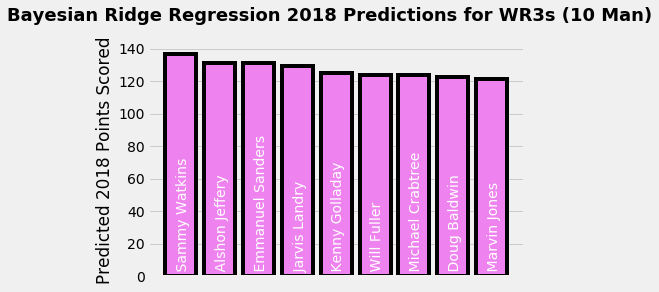

In [54]:
# Predictions for WR3s (WR#21 - WR#30) for using most accurate ML technique (Bayesian Ridge Regression) by RMSE

plt.style.use('fivethirtyeight')
bayespredictions, ax = plt.subplots()

WR3Bayes = []
WR3Bayes = sortedBayes[21:30]
print(WR3Bayes)

sortedBayesData = [row[1] for row in WR3Bayes]
x_pos = np.arange(len(sortedBayesData))

ax.bar(x_pos, sortedBayesData, color = 'violet' ,edgecolor = 'black', linewidth = 4)

labelsWR3 = labels[21:30]
rects = ax.patches
test = 0
for rect, label in zip(rects, labelsWR3):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'white')
    test += 1

bayespredictions.suptitle("Bayesian Ridge Regression 2018 Predictions for WR3s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 Points Scored")

bayespredictions.savefig('bayesianridgepredictionsWR3.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for WR1s:
[['Odell Beckham Jr.', 208.66307432802068], ['Antonio Brown', 197.31398201771955], ['Julio Jones', 194.6707633283161], ['Adam Thielen', 187.00007226672778], ['Michael Thomas', 180.269571302606], ['A.J. Green', 173.97938526611938], ['Mike Evans', 172.86608270176202], ['DeAndre Hopkins', 170.1821821675148], ['JuJu Smith-Schuster', 169.3086144366463], ['Keenan Allen', 163.6667183129688]]


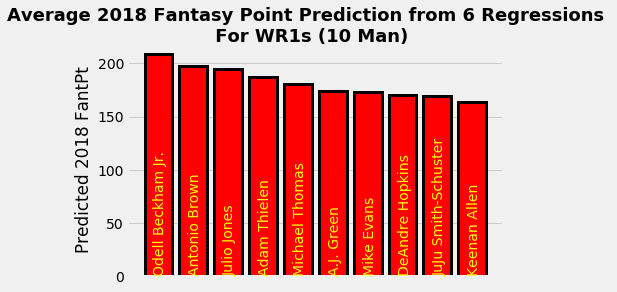

In [55]:
# Average Predictions plot for WR1 (WR#1 - WR#10) 

avgPredictions, ax = plt.subplots()

averagePred = []
name = 0

for h, i ,j ,k , l,m in zip(linear_preds, ridge_preds, bayes_preds, rf_preds, gb_preds, svr_preds):
    averagePred.append([linear_preds[name][0], (svr_preds[name][1] + linear_preds[name][1] + ridge_preds[name][1] + bayes_preds[name][1] + rf_preds[name][1] + gb_preds[name][1]) / 6])
    name += 1

sortedAvg = sorted(averagePred, key = itemgetter(1), reverse = True)
WR1Avg = []
WR1Avg = sortedAvg[0:10]
print("Average 2018 Season Projections for WR1s:")
print(WR1Avg)

sortedAvgData = [row[1] for row in WR1Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'Red', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsWR1 = labels[0:10]

rects = ax.patches
for rect, label in zip(rects, labelsWR1):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'Yellow')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 6 Regressions \n For WR1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsWR1.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for WR2s:
[['Larry Fitzgerald', 162.3809709412072], ['Brandin Cooks', 162.28494279843727], ['Demaryius Thomas', 161.45801547958703], ['Allen Robinson', 158.6531856624375], ['T.Y. Hilton', 158.1487623238173], ['Josh Gordon', 157.2034502486132], ['Stefon Diggs', 155.54910359083598], ['Cooper Kupp', 153.75075656561026], ['Amari Cooper', 149.4011917963199]]


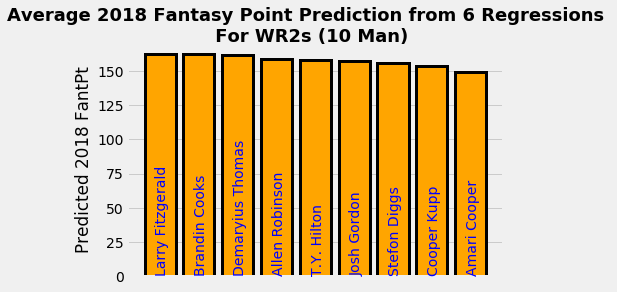

In [58]:
# Average Predictions plot for WR2 (WR#11 - WR#20) 

avgPredictions, ax = plt.subplots()

WR2Avg = []
WR2Avg = sortedAvg[11:20]
print("Average 2018 Season Projections for WR2s:")
print(WR2Avg)

sortedAvgData = [row[1] for row in WR2Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'orange', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsWR2 = labels[11:20]

rects = ax.patches
for rect, label in zip(rects, labelsWR2):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 6 Regressions \n For WR2s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsWR2.png', dpi = 400, bbox_inches = 'tight')

Average 2018 Season Projections for WR3s:
[['Sammy Watkins', 147.31379171331517], ['Alshon Jeffery', 143.593073532036], ['Emmanuel Sanders', 141.1526370068033], ['Doug Baldwin', 140.1243555834481], ['Will Fuller', 139.06327591449096], ['Jarvis Landry', 138.90955498954068], ['Michael Crabtree', 138.8810365166278], ['Kenny Golladay', 138.55824331096213], ['Marvin Jones', 138.2186013653959]]


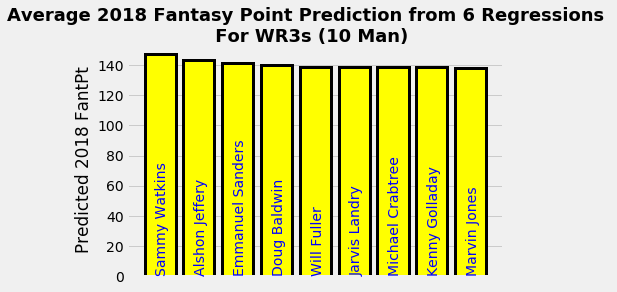

In [59]:
# Average Predictions plot for WR3 (WR#11 - WR#20) 

avgPredictions, ax = plt.subplots()

WR3Avg = []
WR3Avg = sortedAvg[21:30]
print("Average 2018 Season Projections for WR3s:")
print(WR3Avg)

sortedAvgData = [row[1] for row in WR3Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'yellow', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsWR3 = labels[21:30]

rects = ax.patches
for rect, label in zip(rects, labelsWR3):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'blue')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 6 Regressions \n For WR3s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsWR3.png', dpi = 400, bbox_inches = 'tight')